### Introduction
This data set contains information about 5,000 movies collected from The Movie Database (TMDb) via kaggle.https://www.kaggle.com/tmdb/tmdb-movie-metadata 

### The questions about this dataset:

1. Does higher budget mean higher popularity ? What is the kind of relationship ?

2. Will the runtime affect the vote count and popularity?

3. Does Higher popularity means higher profits ?

4. What Features are associated with Top 10 Revenue Movies ?

5. Which genres are most popular from year to year?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the file into a dataframe using pd.read_csv() method of pandas
df = pd.read_csv('tmdb_5000_movies.csv')
# Display first five rows of the dataset using .head() method
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# .shape attribute gives no of rows and no of columns as a tuple
df.shape

(4803, 20)

In [4]:
# view all the columns in the dataframe.
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Dropping the Columns

In [7]:
cols_to_drop = ['status' ,'tagline', 'homepage', 'original_title', 'id', 'spoken_languages']
df1 = df.drop(cols_to_drop, axis = 1)

In [8]:
df1.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
title                   0
vote_average            0
vote_count              0
dtype: int64

#### Seperate the Numerical and Categorical Features

In [9]:
df_num = df1.select_dtypes(exclude = 'object')
df_num.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


In [10]:
df_num.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


The minimum budget is showing zero which indicates the presence of outliers

In [11]:
df1.budget.mean()

29045039.87528628

In [12]:
df1.runtime.mean()

106.87585919600083

Text(0.5, 1.0, 'Average Count')

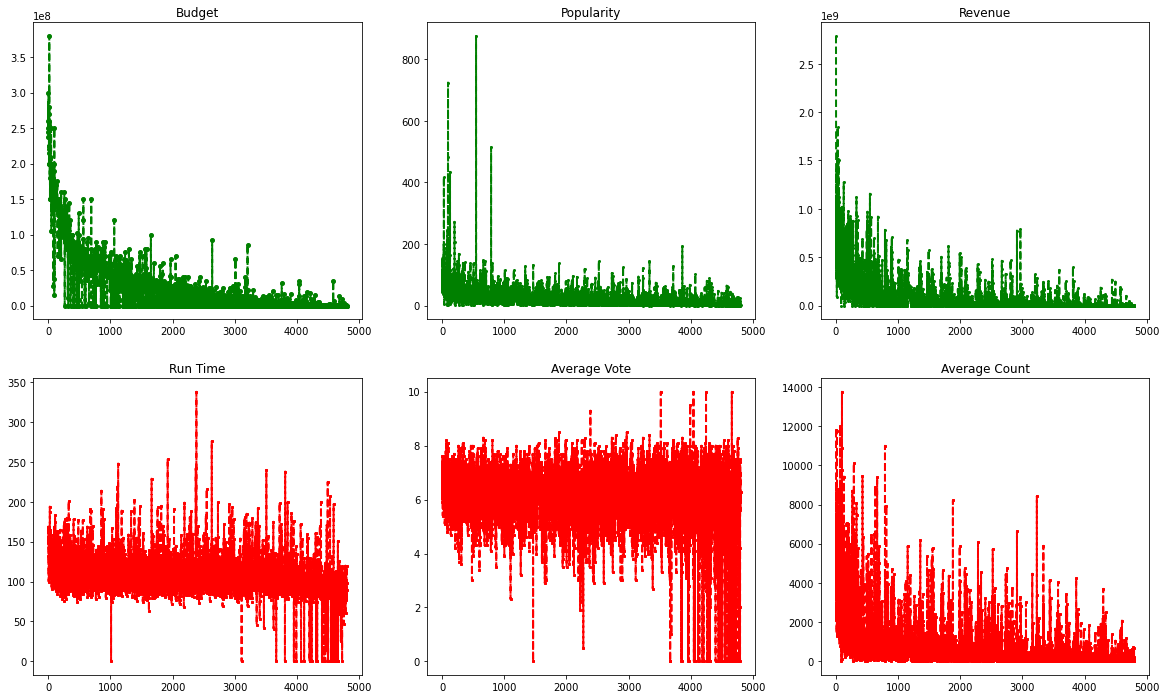

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,12))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.flatten()

# plot for budget
ax1.plot(df_num.budget, 'go--', linewidth=2, markersize=4)
ax1.set_title('Budget')
# plot for popularity
ax2.plot(df_num.popularity,'go--', linewidth=2, markersize=2)
ax2.set_title('Popularity')
# plot for revenue
ax3.plot(df_num.revenue,'go--', linewidth=2, markersize=2)
ax3.set_title('Revenue')
# plot for runtime
ax4.plot(df_num.runtime,'rs--', linewidth=2, markersize=2)
ax4.set_title('Run Time')
# plot for vote_average
ax5.plot(df_num.vote_average,'rs--', linewidth=2, markersize=2)
ax5.set_title('Average Vote')
# plot for vote_count
ax6.plot(df_num.vote_count,'rs--', linewidth=2, markersize=2)
ax6.set_title('Average Count')


In [14]:
df[df['budget'] == 0].shape

(1037, 20)

In [15]:
df[df['revenue'] == 0].shape

(1427, 20)

In [16]:
df[df['popularity'] == 0].shape

(1, 20)

In [17]:
df[df['vote_average'] == 0].shape

(63, 20)

As we can seee our data contains a lot of zeroes in columns like budget, revenue, vote_average etc. This could be mainly due to two reasons;
- a) Improper Data Collection or 
- b) The movie was never made. 

Regarding this i looked up on the internet about the movies and found that most of them were released and had a sizeable budget. Thus this points towards faulty or incomplete data collection. 
One way to handle this could be to:

- <b>Drop the rows with zero values of budget</b>, but this is a rather crude way to handle the problem and since the number of rows having zero are large, it would lead to a loss of data present in other columns. 
Another approach can be to: 
- <b>Replace the zeroes with either the mean, mode, median etc</b>. However if you think again, it is not such a good idea to replace with measures of central tendency as the budget depends on a large number of factors and varies significantly case to case. 
- <b>Using a Machine Learning model to predict the values</b>. The Problem with this technique is that we dont have enough data points to build a reliable model and also the existing data is unclean and has a lot missing/ wrong values. Further it would take a lot of time to build a model whose accuracy will not even be that good.
- <b>Replacing the 0's with np.NaN or null values</b>. This is the overall best approach from our analysis point of view. Since we are interested in Exploratory Data Analysis which can tell us the trends or patterns its best we dont impute any of our own values inplace of zero, so as to not change the true underlying pattern present in the data.


#### Replacing the Zeroes With NaN

In [18]:
df1['budget'] = df1['budget'].replace(0, np.NaN)
df1['revenue'] = df1['revenue'].replace(0, np.NaN)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3766 non-null   float64
 1   genres                4803 non-null   object 
 2   keywords              4803 non-null   object 
 3   original_language     4803 non-null   object 
 4   overview              4800 non-null   object 
 5   popularity            4803 non-null   float64
 6   production_companies  4803 non-null   object 
 7   production_countries  4803 non-null   object 
 8   release_date          4802 non-null   object 
 9   revenue               3376 non-null   float64
 10  runtime               4801 non-null   float64
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 525.5+ KB


In [20]:
df1.to_csv(r'C:\Users\DELL\Kaggle\EDA - Movies Dataset\TMDb Movies Data (5000)\tmdb_movies_5000_cleaned).csv')

## EDA To Be Continued On Clean Data In The Next Part